This is a Notebook of student-performance-predictor

In this model we taken a math_score as a Predictor column

In [94]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor

In [95]:
df = pd.read_csv(R'C:\Student-Success-Predictor\Model_Evaluation\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [97]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [98]:
df.duplicated().sum()

0

Histplot

<Axes: xlabel='math score', ylabel='Count'>

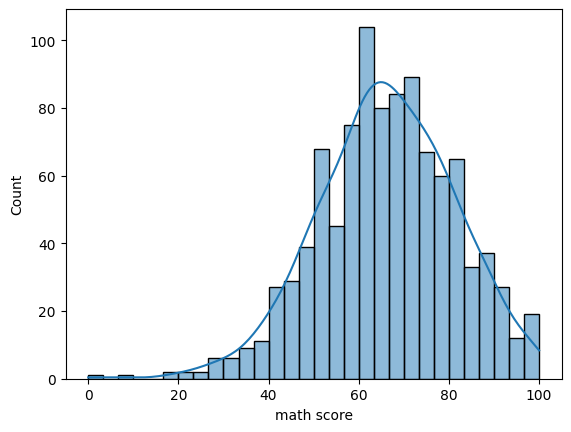

In [99]:
sns.histplot(df['math score'], bins=30, kde=True)

In [100]:
#data = df['math score']

#data_log = np.log10(data)

In [101]:
#df['math score'] = data_log


In [102]:
#sns.histplot(df['math score'], bins=30, kde=True)

In [103]:
df.columns


Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [104]:
for i in df[['gender', 'race/ethnicity', 'parental level of education', 'lunch','test preparation course', 'math score', 'reading score','writing score']]:
    print(f"Unique values in col '{i}' :{df[i].unique()}")

Unique values in col 'gender' :['female' 'male']
Unique values in col 'race/ethnicity' :['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in col 'parental level of education' :["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in col 'lunch' :['standard' 'free/reduced']
Unique values in col 'test preparation course' :['none' 'completed']
Unique values in col 'math score' :[ 72  69  90  47  76  71  88  40  64  38  58  65  78  50  18  46  54  66
  44  74  73  67  70  62  63  56  97  81  75  57  55  53  59  82  77  33
  52   0  79  39  45  60  61  41  49  30  80  42  27  43  68  85  98  87
  51  99  84  91  83  89  22 100  96  94  48  35  34  86  92  37  28  24
  26  95  36  29  32  93  19  23   8]
Unique values in col 'reading score' :[ 72  90  95  57  78  83  43  64  60  54  52  81  53  75  89  32  42  58
  69  73  71  74  70  65  87  56  61  84  55  44  41  85  59  17  39  80
  37  63  51  49  26  

In [105]:
x = df.drop(['math score'], axis=1)
y = df['math score']

In [106]:
cat_col = x.select_dtypes(include=['object']).columns
num_col = x.select_dtypes(exclude=['object']).columns



from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

num_transform = StandardScaler()
cat_transform = OneHotEncoder()

preprocess = ColumnTransformer(
    [
        ("OneHotEncoder", cat_transform, cat_col),
        ("StandardEncoding", num_transform, num_col)
    ]
)

In [147]:
cat_col

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course'],
      dtype='object')

In [148]:
num_col

Index(['reading score', 'writing score'], dtype='object')

In [107]:
x = preprocess.fit_transform(x)

In [108]:
x.shape

(1000, 19)

In [109]:
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

Creating a model evaluation function

In [123]:
def evaluation_model(true, predict):
    mae = mean_absolute_error(true, predict),
    mse = mean_squared_error(true, predict),
    r2 = r2_score(true, predict),
    return mae, mse, r2

Model Implementation

In [114]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor  
from catboost import CatBoostRegressor          
from lightgbm import LGBMRegressor      
from xgboost import XGBRegressor   


In [138]:

Model = {
    "Linear_Regression " : LinearRegression(),
    "Decision_tree " : DecisionTreeRegressor(),
    "Random_forest " : RandomForestRegressor(),
    "KNeighborsRegressor" : KNeighborsRegressor(),
    "Support-Vector-Machine" : SVR(),
    "Ridge " : Ridge(),
    "Lasso " : Lasso(),
    "XGBoost_Regression" : XGBRegressor(),
    "AdaBoost_Regression " : AdaBoostRegressor(),
    "CatBoost_Regression " : CatBoostRegressor(),
    "LightBoost_Regression ": LGBMRegressor() ,
}

model_list = []
r2_list = []

for i in range(len(list(Model))):
    models = list(Model.values())[i]
    models.fit(x_train,y_train)

    #Make Prediction
    y_pred = models.predict(x_test) 

    #Evaluating model score
    model_mae, model_mse, model_r2 = evaluation_model(y_test, y_pred)

    print(list(Model.keys())[i])
    model_list.append(list(Model.keys())[i])
    r2_list.append(model_r2)

     # Printing the evaluation metrics
    #print('----------------',list(Model.keys())[i],'----------------------')
    print("Model Performance ")
    print("Mean Squared Error:", model_mae)
    print("Mean Absolute Error:", model_mse)
    print("R2-Score:", model_r2)
    print('--------------------------------------')

Linear_Regression 
Model Performance 
Mean Squared Error: (4.2259375,)
Mean Absolute Error: (29.26380859375,)
R2-Score: (0.8797402769404664,)
--------------------------------------
Decision_tree 
Model Performance 
Mean Squared Error: (6.135,)
Mean Absolute Error: (60.845,)
R2-Score: (0.7499572611638772,)
--------------------------------------
Random_forest 
Model Performance 
Mean Squared Error: (4.642429166666666,)
Mean Absolute Error: (35.882781322916664,)
R2-Score: (0.8525395855199317,)
--------------------------------------
KNeighborsRegressor
Model Performance 
Mean Squared Error: (5.615999999999999,)
Mean Absolute Error: (52.586000000000006,)
R2-Score: (0.7838976503502941,)
--------------------------------------
Support-Vector-Machine
Model Performance 
Mean Squared Error: (5.4015392444969965,)
Mean Absolute Error: (66.04200493745648,)
R2-Score: (0.7286001513223705,)
--------------------------------------
Ridge 
Model Performance 
Mean Squared Error: (4.21110068801426,)
Mean Abs

In [139]:
r2_list

[(0.8797402769404664,),
 (0.7499572611638772,),
 (0.8525395855199317,),
 (0.7838976503502941,),
 (0.7286001513223705,),
 (0.8805931485028738,),
 (0.8253197323627852,),
 (0.8277965653186071,),
 (0.8459585390407383,),
 (0.8516318920747058,),
 (0.8411071675178521,)]

In [140]:
pd.DataFrame(list(zip(model_list, r2_list)),columns=['Model name', 'R2_Score']).sort_values(by=['R2_Score'], ascending=False)

,Model name,R2_Score
5,Ridge,"(0.8805931485028738,)"
0,Linear_Regression,"(0.8797402769404664,)"
2,Random_forest,"(0.8525395855199317,)"
9,CatBoost_Regression,"(0.8516318920747058,)"
8,AdaBoost_Regression,"(0.8459585390407383,)"
10,LightBoost_Regression,"(0.8411071675178521,)"
7,XGBoost_Regression,"(0.8277965653186071,)"
6,Lasso,"(0.8253197323627852,)"
3,KNeighborsRegressor,"(0.7838976503502941,)"
1,Decision_tree,"(0.7499572611638772,)"


Linear Regression

In [142]:
mod_lin = LinearRegression()
mod_lin.fit(x_train,y_train)
y_pred = mod_lin.predict(x_test)

r2 = r2_score(y_test, y_pred)

print(r2)


0.8797402769404664


Plotiing Y-Pred and y_test

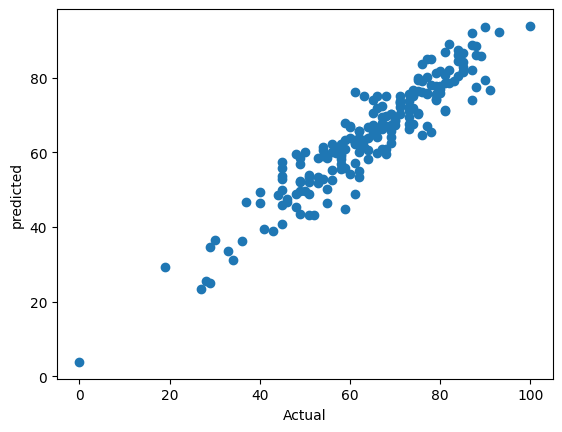

In [143]:
plt.scatter(y_test, y_pred);
plt.xlabel('Actual');
plt.ylabel('predicted');

<Axes: xlabel='math score'>

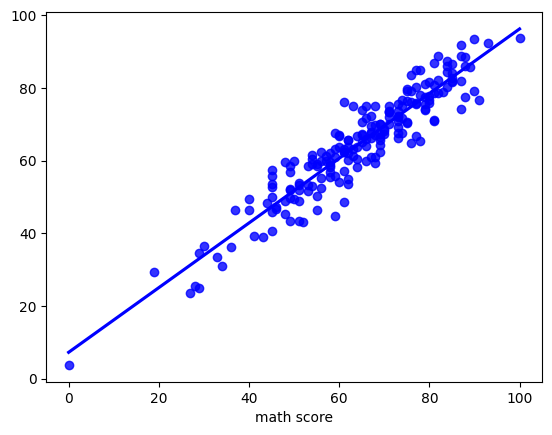

In [145]:
sns.regplot(x=y_test, y=y_pred, ci=None,color='blue')

Difference between actual and predicted

In [146]:
pred_df = pd.DataFrame({'Actual_Value':y_test,'Predicted_value':y_pred, 'Difference':y_test-y_pred})
pred_df

,Actual_Value,Predicted_value,Difference
521,91,76.703125,14.296875
737,53,58.578125,-5.578125
740,80,76.828125,3.171875
660,74,76.734375,-2.734375
411,84,87.484375,-3.484375
...,...,...,...
408,52,43.125000,8.875000
332,62,62.109375,-0.109375
208,74,67.562500,6.437500
613,65,67.328125,-2.328125
